In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from simulated_dipole import *

def zenith_dep(dd):

    n_bins = 12 
    bins = np.linspace(0, 0.75, n_bins+1)
    bin_centers = (bins[1:]+bins[:-1])/2 
    bin_idx = np.digitize(np.sin(dd['zenith'])**2, bins)-1 

    y_means = np.array([dd['dnn_xmax'][bin_idx == i].mean() for i in range(n_bins)])
    y_std = np.array([dd['dnn_xmax'][bin_idx == i].std() for i in range(n_bins)])
    n_points = np.array([np.sum(bin_idx == i) for i in range(n_bins)])
    y_se = y_std / np.sqrt(n_points)
    print(n_points)
    y_mean = np.mean(y_means)
    val = {
        'x': bin_centers,
        'y': y_means/y_mean,
        'std_y': y_std/y_mean,
        'n': n_points
    }
    y_m = np.mean(val['y'])
    valid = val["n"] > 1
    null_chisq = [((val["y"][valid][i]-y_m)/(val["std_y"][valid][i] / val["n"][valid][i]**0.5))**2 for i in range(len(val["x"][valid]))]
    null_chisq = np.sum(null_chisq)/(len(val["x"][valid])-1)
    
    return val, null_chisq

# Zenith dependence of AixNet predictions

dict_keys(['dnn_xmax', 'zenith', 'energy', 'primary', 'mass'])
879887
237785
217231
[4581 4504 4610 4446 4240 4316 4566 4572 4778 4643 4557 4723]
[4581 4633 4487 4521 4308 4696 4573 4528 4686 4469 4451 4404]
[4663 4609 4602 4150 4459 4782 4635 4582 4380 4416 4445 4609]
[4628 4374 4530 4635 4343 4524 4317 4748 4469 4356 4579 4523]
[18453 18120 18229 17752 17350 18318 18091 18430 18313 17884 18032 18259]


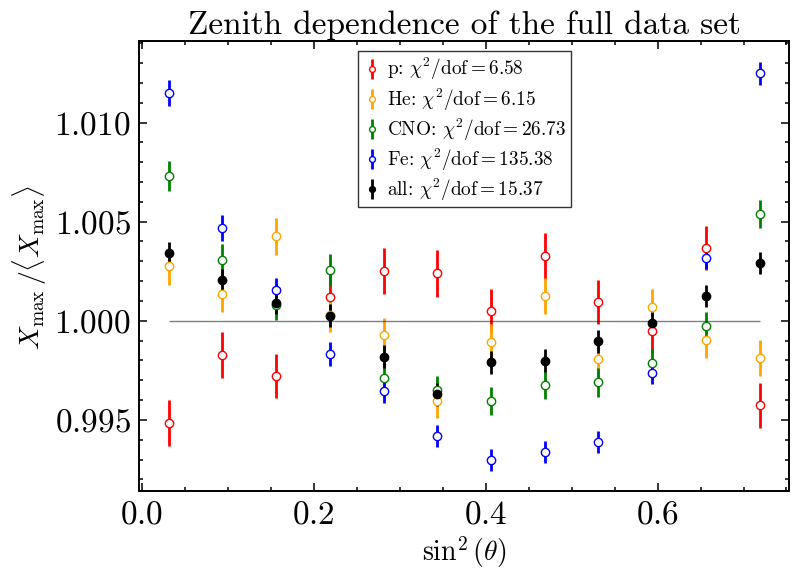

In [5]:
dd = file_loader('AixNet_SYBILL')

dd = remove_nan_entries(dd) # needed for KAne
ene_mask = (dd['energy']>=8)
dd = dict_cutter(dd, ene_mask)
print(len(dd['energy']))
zenith_mask = (dd['zenith']<=np.radians(60))
dd = dict_cutter(dd, zenith_mask)
print(len(dd['energy']))


val_mass = {}
chisq_mass = {}

plt.figure(figsize=(10, 6))
plt.title('Zenith dependence of the full data set')

for name in names:
    mass = names[name]
    mass_mask = (dd['mass']==mass)
    dd_temp = dict_cutter(dd, mass_mask)
    val, null_chisq = zenith_dep(dd_temp)
    plt.errorbar(val['x'], val['y'], yerr=(val['std_y']/np.sqrt(val['n'])), linestyle='', marker='o', markersize=6, color='w', markeredgecolor=colors[name], ecolor=colors[name], lw=2, label=rf'{name}: $\chi^2 /\mathrm{{dof}} = {null_chisq:.2f}$')



val, null_chisq = zenith_dep(dd)
y_mean = np.nanmean(val['y'])
plt.errorbar(val['x'], val['y'], yerr=(val['std_y']/np.sqrt(val['n'])), linestyle='', marker='o', markersize=6, color='k', ecolor='k', lw=2, label=rf'all: $\chi^2 /\mathrm{{dof}} = {null_chisq:.2f}$')
plt.hlines(y_mean, np.min(val['x']), np.max(val['x']), color="k", linewidth=1, alpha=0.5)
plt.legend(fontsize='x-small')
plt.xlabel(r'$\sin^2(\theta)$')
plt.ylabel(r'$X_\mathrm{max}  \, / \langle X_\mathrm{max}\rangle$')
plt.show()

[45 47 50 46 30 29 41 52 48 41 45 42]
[782 729 783 846 754 863 806 773 835 760 792 803]
[775 710 720 703 762 783 724 667 722 719 671 738]
[269 203 194 237 195 181 224 268 236 219 230 229]
[1871 1689 1747 1832 1741 1856 1795 1760 1841 1739 1738 1812]


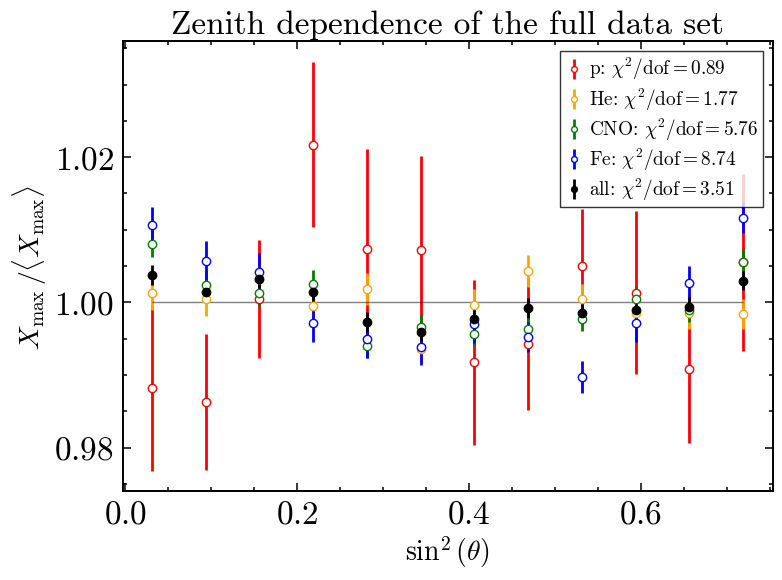

After energy spectrum: 21421


In [6]:
energies = np.array([8e18, 16e18, 32e18, 200e18])

mf = mass_fractions()
es = energy_spectrum()
smd = SMD_method()
mf.seed = 11
es.seed = 200

mass_mask = mf.extract_all_fractions(np.log10(dd['energy'])+18, dd['mass']) 
dd = dict_cutter(dd, mass_mask)

temp_dict = [{} for i in range(3)]
for i in range(len(energies[:-1])):
    enne = energies[i]/1e18
    enneplus = energies[i+1]/1e18
    energy_mask = (dd['energy']>=enne)&(dd['energy']<enneplus)
    temp_dict[i] = dict_cutter(dd, energy_mask)
    spectrum_mask = es.spectrum_fraction(temp_dict[i]['energy'])
    temp_dict[i] = dict_cutter(temp_dict[i], spectrum_mask)

dd = dict_paster(temp_dict)

dd['charge'] = np.empty_like(dd['mass'])
for mass in names:
    dd['charge'][np.where(dd['mass']==names[mass])]=charges[mass]


val_mass = {}
chisq_mass = {}

plt.figure(figsize=(10, 6))
plt.title('Zenith dependence of the full data set')

for name in names:
    mass = names[name]
    mass_mask = (dd['mass']==mass)
    dd_temp = dict_cutter(dd, mass_mask)
    val, null_chisq = zenith_dep(dd_temp)
    plt.errorbar(val['x'], val['y'], yerr=(val['std_y']/np.sqrt(val['n'])), linestyle='', marker='o', markersize=6, color='w', markeredgecolor=colors[name], ecolor=colors[name], lw=2, label=rf'{name}: $\chi^2 /\mathrm{{dof}} = {null_chisq:.2f}$')



val, null_chisq = zenith_dep(dd)
y_mean = np.nanmean(val['y'])
plt.errorbar(val['x'], val['y'], yerr=(val['std_y']/np.sqrt(val['n'])), linestyle='', marker='o', markersize=6, color='k', ecolor='k', lw=2, label=rf'all: $\chi^2 /\mathrm{{dof}} = {null_chisq:.2f}$')
plt.hlines(y_mean, np.min(val['x']), np.max(val['x']), color="k", linewidth=1, alpha=0.5)
plt.legend(fontsize='x-small')
plt.xlabel(r'$\sin^2(\theta)$')
plt.ylabel(r'$X_\mathrm{max}  \, / \langle X_\mathrm{max}\rangle$')
plt.show()

print('After energy spectrum:', len(dd['energy']))